# Importando bibliotecas importantes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import locale

# Carregando o dataset

In [2]:
df = pd.read_csv('cota-parlamentar.csv')

# Pré processando o dataset e criando filtros

In [3]:
frases_unicas = df['txtdescricao'].unique()

for frase in frases_unicas:
    print(frase)

DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR
COMBUSTÍVEIS E LUBRIFICANTES.
PASSAGENS AÉREAS
TELEFONIA
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES
SERVIÇOS POSTAIS
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.
Emissão Bilhete Aéreo
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR
LOCAÇÃO OU FRETAMENTO DE AERONAVES
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS
ASSINATURA DE PUBLICAÇÕES
LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES
LOCOMOÇÃO, ALIMENTAÇÃO E  HOSPEDAGEM
AQUISIÇÃO DE MATERIAL DE ESCRITÓRIO.
AQUISIÇÃO OU LOC. DE SOFTWARE; SERV. POSTAIS; ASS.


In [4]:
filtro_divulgacao = df['txtdescricao'] == 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'
filtro_alimentacao = df['txtdescricao'] == 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR'
filtro_manutencao_escritorio = df['txtdescricao'] == 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR'
filtro_passagens_aereas = df['txtdescricao'] == 'PASSAGENS AÉREAS'
# filtro_telefonia = df['txtdescricao'] == 'TELEFONIA'
# filtro_locacao_veiculos = df['txtdescricao'] == 'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES'
# filtro_servicos_postais = df['txtdescricao'] == 'SERVIÇOS POSTAIS'
# filtro_consultoria = df['txtdescricao'] == 'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.'
# filtro_servico_seguranca = df['txtdescricao'] == 'SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.'
# filtro_emissao_bilhete_aereo = df['txtdescricao'] == 'Emissão Bilhete Aéreo'
# filtro_hospedagem = df['txtdescricao'] == 'HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.'
# filtro_taxi = df['txtdescricao'] == 'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO'
# filtro_curso_palestra = df['txtdescricao'] == 'PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR'
# filtro_curso_locacao_aeronave = df['txtdescricao'] == 'LOCAÇÃO OU FRETAMENTO DE AERONAVES'
# filtro_passagens = df['txtdescricao'] == 'PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS'
# filtro_assinatura_publicacoes = df['txtdescricao'] == 'ASSINATURA DE PUBLICAÇÕES'
# filtro_locacao_veiculos_ou_embarcacoes = df['txtdescricao'] == 'LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES'
# filtro_locomocao = df['txtdescricao'] == 'LOCOMOÇÃO, ALIMENTAÇÃO E  HOSPEDAGEM'
# filtro_escritorio = df['txtdescricao'] == 'AQUISIÇÃO DE MATERIAL DE ESCRITÓRIO.'
# filtro_aquisicao_ou_loc_software = df['txtdescricao'] == 'AQUISIÇÃO OU LOC. DE SOFTWARE; SERV. POSTAIS; ASS.'




In [5]:
df_alimentacao = df[filtro_alimentacao]
df_divulgacao = df[filtro_divulgacao]
df_manutencao_escritorio  = df[filtro_manutencao_escritorio]
df_passagens_aereas = df[filtro_passagens_aereas]

In [6]:
df_divulgacao.head()

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.00,0.0,998.00,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.00,0.0,4920.00,NaN
20,56,2020-01-13 00:00:00,6994686,NaN,0,NaN,2439,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,AP SELF MEDIA COMUNICAÇÃO LTDA EPP,103,NaN,NaN,968.00,0.0,968.00,NaN
21,56,2020-02-03 00:00:00,7002616,NaN,0,NaN,2439,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,AP SELF MEDIA COMUNICAÇÃO LTDA EPP,104,NaN,NaN,1011.56,0.0,1011.56,NaN
22,56,2020-03-04 00:00:00,7026566,NaN,0,NaN,2439,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,AP SELF MEDIA COMUNICAÇÃO LTDA EPP,105,NaN,NaN,1011.56,0.0,1011.56,NaN


In [7]:
df_alimentacao.head()

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.00,0.0,511.00,NaN
3,56,2020-02-18 00:00:00,7018634,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.00,0.0,186.00,NaN
4,56,2020-02-11 00:00:00,7011106,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.00,0.0,740.00,NaN
5,56,2020-02-12 00:00:00,7012913,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,EMPORIO ARABE BRASILIA LTDA ME,29,NaN,NaN,802.95,0.0,802.95,NaN
6,56,2020-02-17 00:00:00,7017202,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,M LELIS CAFETERIA LTDA ME,16420,NaN,NaN,730.00,0.0,730.00,NaN


In [8]:
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [9]:
df_alimentacao.isna()['vlrdocumento'].sum()
df_divulgacao.isna()['vlrdocumento'].sum()
df_manutencao_escritorio.isna()['vlrdocumento'].sum()
df_passagens_aereas.isna()['vlrdocumento'].sum()

1

In [10]:
df_alimentacao.dropna(subset=['vlrdocumento'], inplace=True)
df_divulgacao.dropna(subset=['vlrdocumento'], inplace=True)
df_manutencao_escritorio.dropna(subset=['vlrdocumento'], inplace=True)
df_passagens_aereas.dropna(subset=['vlrdocumento'], inplace=True)

/tmp/ipykernel_67712/4120690115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alimentacao.dropna(subset=['vlrdocumento'], inplace=True)
/tmp/ipykernel_67712/4120690115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_divulgacao.dropna(subset=['vlrdocumento'], inplace=True)
/tmp/ipykernel_67712/4120690115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manutencao_escritorio.dropna(subset=['vlrdocumento'], inplace=T

# Criando Gráficos

In [11]:
# Função para filtrar partidos indesejados
def filtrar_partidos(df, partidos_indesejados):
    return df[~df['txnomeparlamentar'].isin(partidos_indesejados)]

# Função para calcular os gastos por parlamentar e fornecedor
def calcular_gastos_por_parlamentar(df, coluna_valor):
    return df.groupby('txnomeparlamentar')[coluna_valor].sum()

def calcular_gastos_por_fornecedor(df, coluna_valor):
    return df.groupby('txtfornecedor')[coluna_valor].sum()

# Lista de partidos indesejados
excluir_partidos = ['LIDERANÇA DO PSDB', 'LIDERANÇA DO PT', 'LIDMIN', 'NOVO', 'PDT', 'PODE', 'PP', 'PROS', 'PSD', 'PTB', 'SDD']



# Filtrar os dataframes de acordo com os partidos indesejados
df_alimentacao_filtrado = filtrar_partidos(df_alimentacao, excluir_partidos)
df_divulgacao_filtrado = filtrar_partidos(df_divulgacao, excluir_partidos)
df_manutencao_escritorio_filtrado = filtrar_partidos(df_manutencao_escritorio, excluir_partidos)
df_passagens_aereas_filtrado = filtrar_partidos(df_passagens_aereas, excluir_partidos)

# Calcular os gastos por parlamentar
gastos_por_parlamentar = calcular_gastos_por_parlamentar(df_alimentacao_filtrado, 'vlrdocumento')
gastos_por_parlamentar_divulgacao = calcular_gastos_por_parlamentar(df_divulgacao_filtrado, 'vlrdocumento')
gastos_por_parlamentar_manutencao_escritorio = calcular_gastos_por_parlamentar(df_manutencao_escritorio_filtrado, 'vlrdocumento')
gastos_por_parlamentar_passagens_aereas = calcular_gastos_por_parlamentar(df_passagens_aereas_filtrado, 'vlrdocumento')

# Calcular os gastos por fornecedor
pagamentos_por_fornecedor = calcular_gastos_por_fornecedor(df_alimentacao_filtrado, 'vlrdocumento')
pagamentos_por_fornecedor_divulgacao = calcular_gastos_por_fornecedor(df_divulgacao_filtrado, 'vlrdocumento')
pagamentos_por_fornecedor_manutencao_escritorio = calcular_gastos_por_fornecedor(df_manutencao_escritorio_filtrado, 'vlrdocumento')
pagamentos_por_fornecedor_passagens_aereas = calcular_gastos_por_fornecedor(df_passagens_aereas_filtrado, 'vlrdocumento')

In [12]:
top_10_gastos = gastos_por_parlamentar.nlargest(10)
top_10_gastos_divulgacao = gastos_por_parlamentar_divulgacao.nlargest(10)
top_10_gastos_manutencao_escritorio = gastos_por_parlamentar_manutencao_escritorio.nlargest(10)
top_10_gastos_passagens_aereas = gastos_por_parlamentar_passagens_aereas.nlargest(10)

# Top 10 deputados com maiores gastos com divulgação, alimentação, manutenção de escritório e passagens aéreas

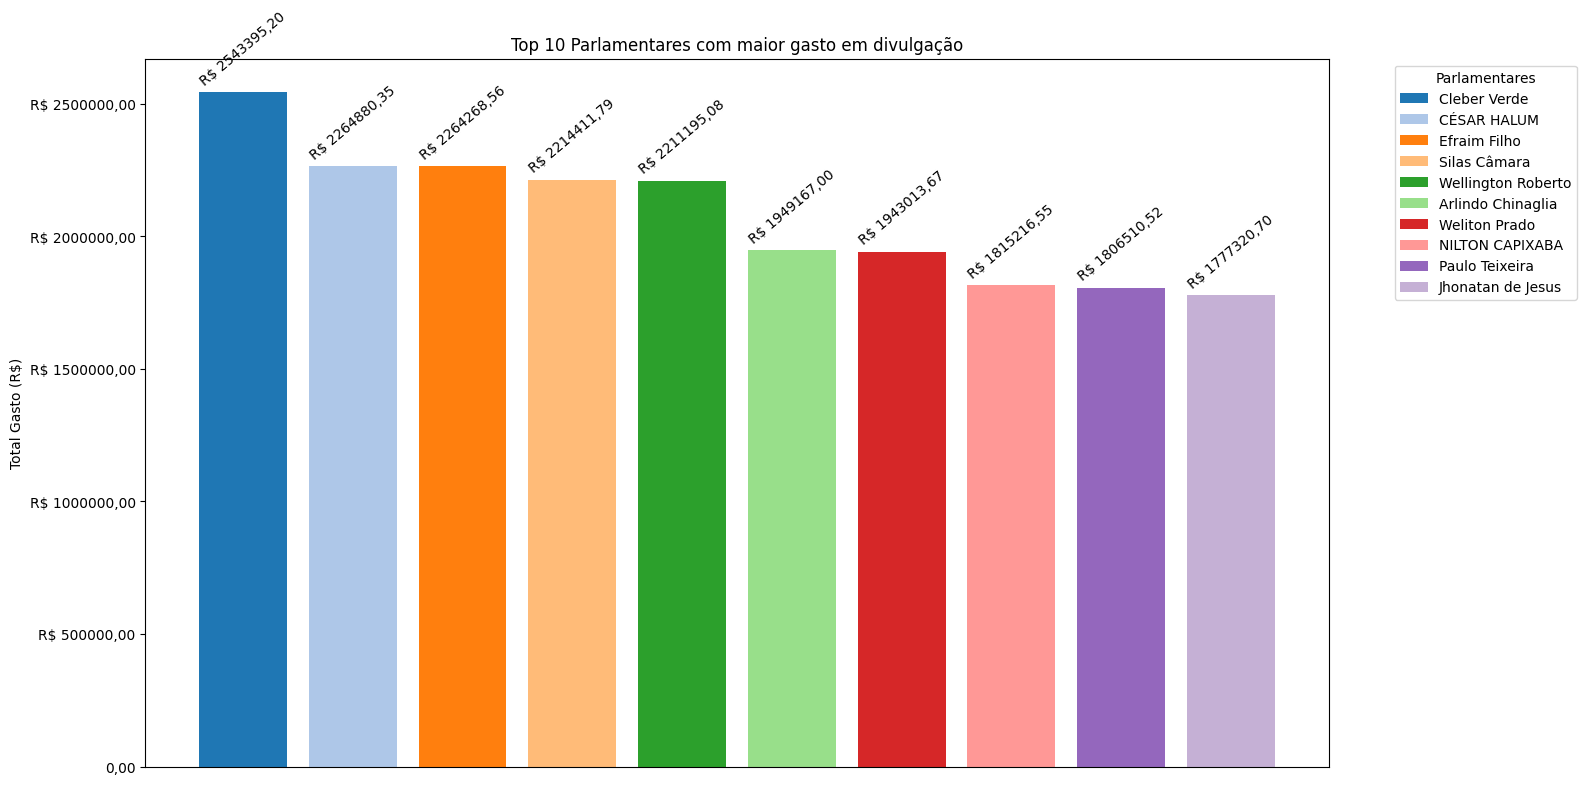

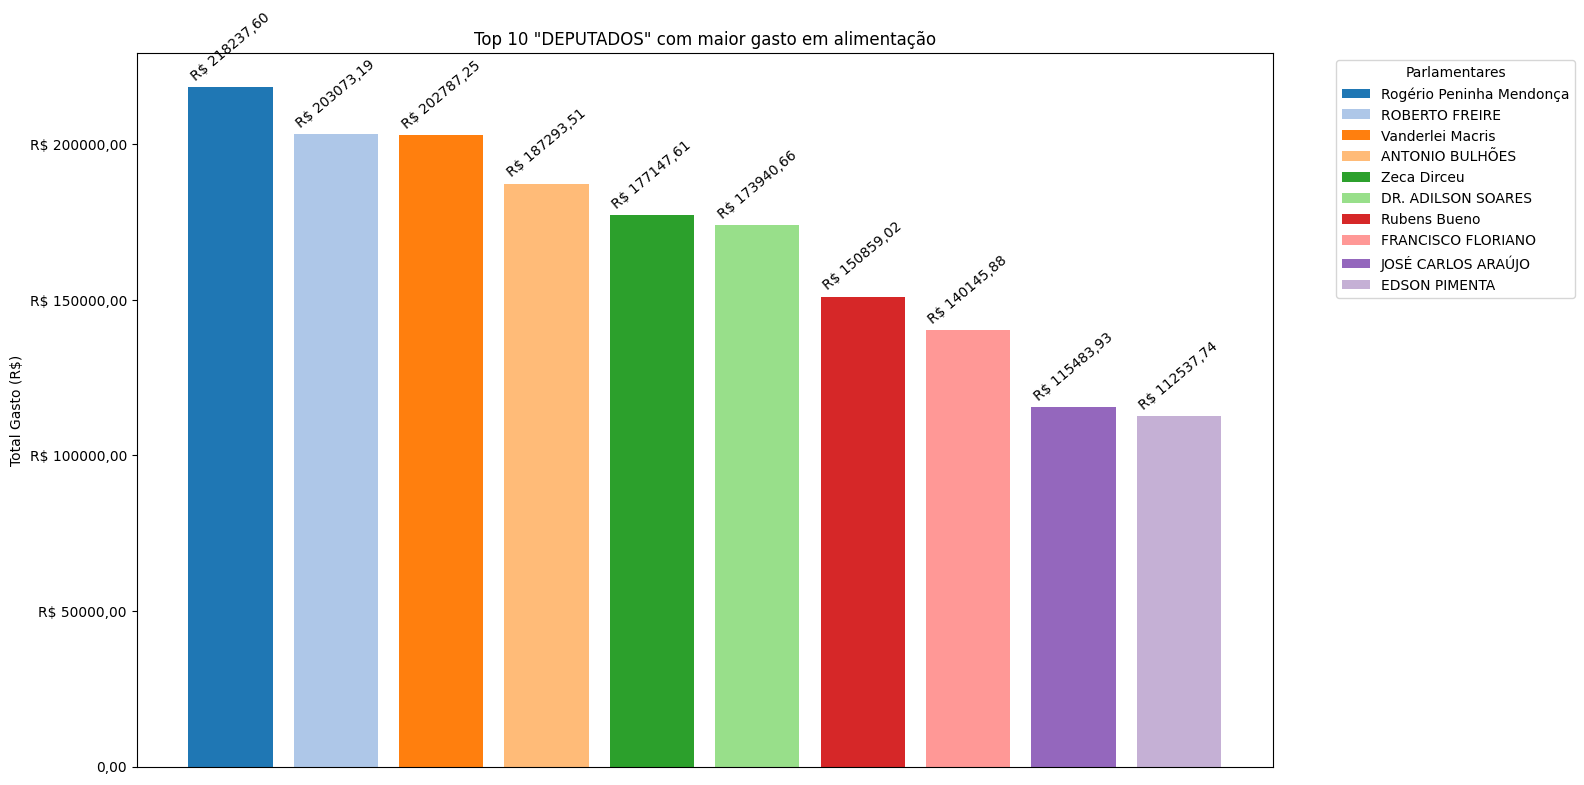

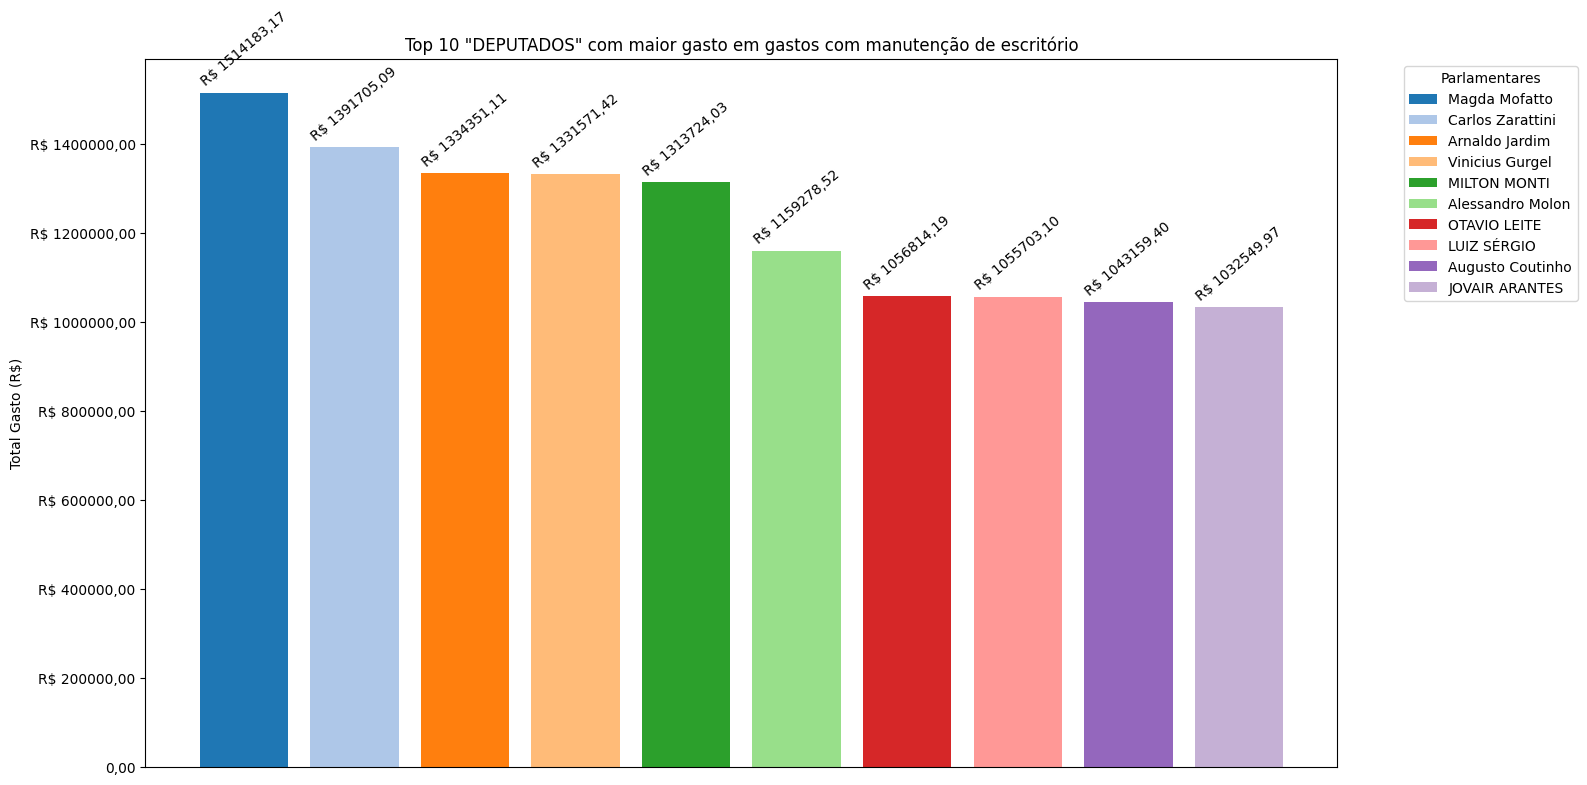

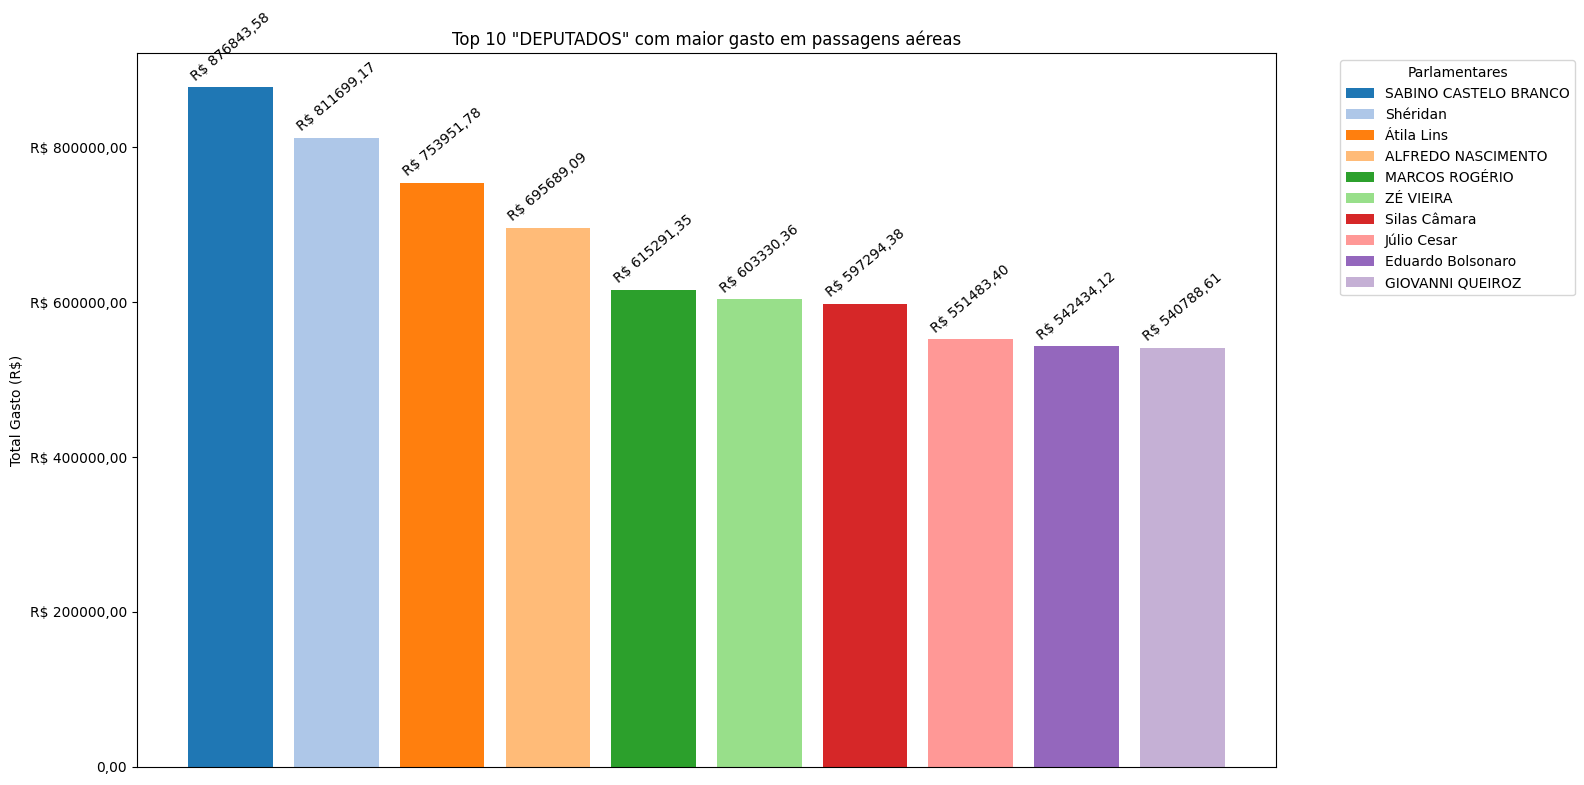

In [13]:
def plot_top_10_gastos(data, title, category):
    plt.figure(figsize=(16, 8))
    colors = plt.cm.tab20.colors[:10]
    ax = plt.bar(data.index, data.values, color=colors)
    plt.ylabel('Total Gasto (R$)')
    plt.title(title)

    plt.gca().yaxis.set_major_formatter(locale.currency)

    plt.legend(ax, data.index, title='Parlamentares', bbox_to_anchor=(1.05, 1), loc='upper left')

    for bar in ax:
        height = bar.get_height()
        plt.annotate(locale.currency(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=40)

    plt.xticks([])

    plt.tight_layout()
    plt.show()

# Dados para os gráficos
plot_top_10_gastos(top_10_gastos_divulgacao, 'Top 10 Parlamentares com maior gasto em divulgação', 'divulgação')
plot_top_10_gastos(top_10_gastos, 'Top 10 "DEPUTADOS" com maior gasto em alimentação', 'alimentação')
plot_top_10_gastos(top_10_gastos_manutencao_escritorio, 'Top 10 "DEPUTADOS" com maior gasto em gastos com manutenção de escritório', 'manutenção de escritório')
plot_top_10_gastos(top_10_gastos_passagens_aereas, 'Top 10 "DEPUTADOS" com maior gasto em passagens aéreas', 'passagens aéreas')


# Top 10 fornecedores que mais receberam pagamentos de divulgação, alimentação, manutenção de escritório e passagens aéreas

In [14]:
top_10_pagamentos = pagamentos_por_fornecedor.nlargest(10)
top_10_pagamentos_fornecedor_divulgacao = pagamentos_por_fornecedor_divulgacao.nlargest(10)
top_10_pagamentos_por_fornecedor_manutencao_escritorio = pagamentos_por_fornecedor_manutencao_escritorio.nlargest(10)
top_10_pagamentos_por_fornecedor_passagens_aereas = pagamentos_por_fornecedor_passagens_aereas.nlargest(10)

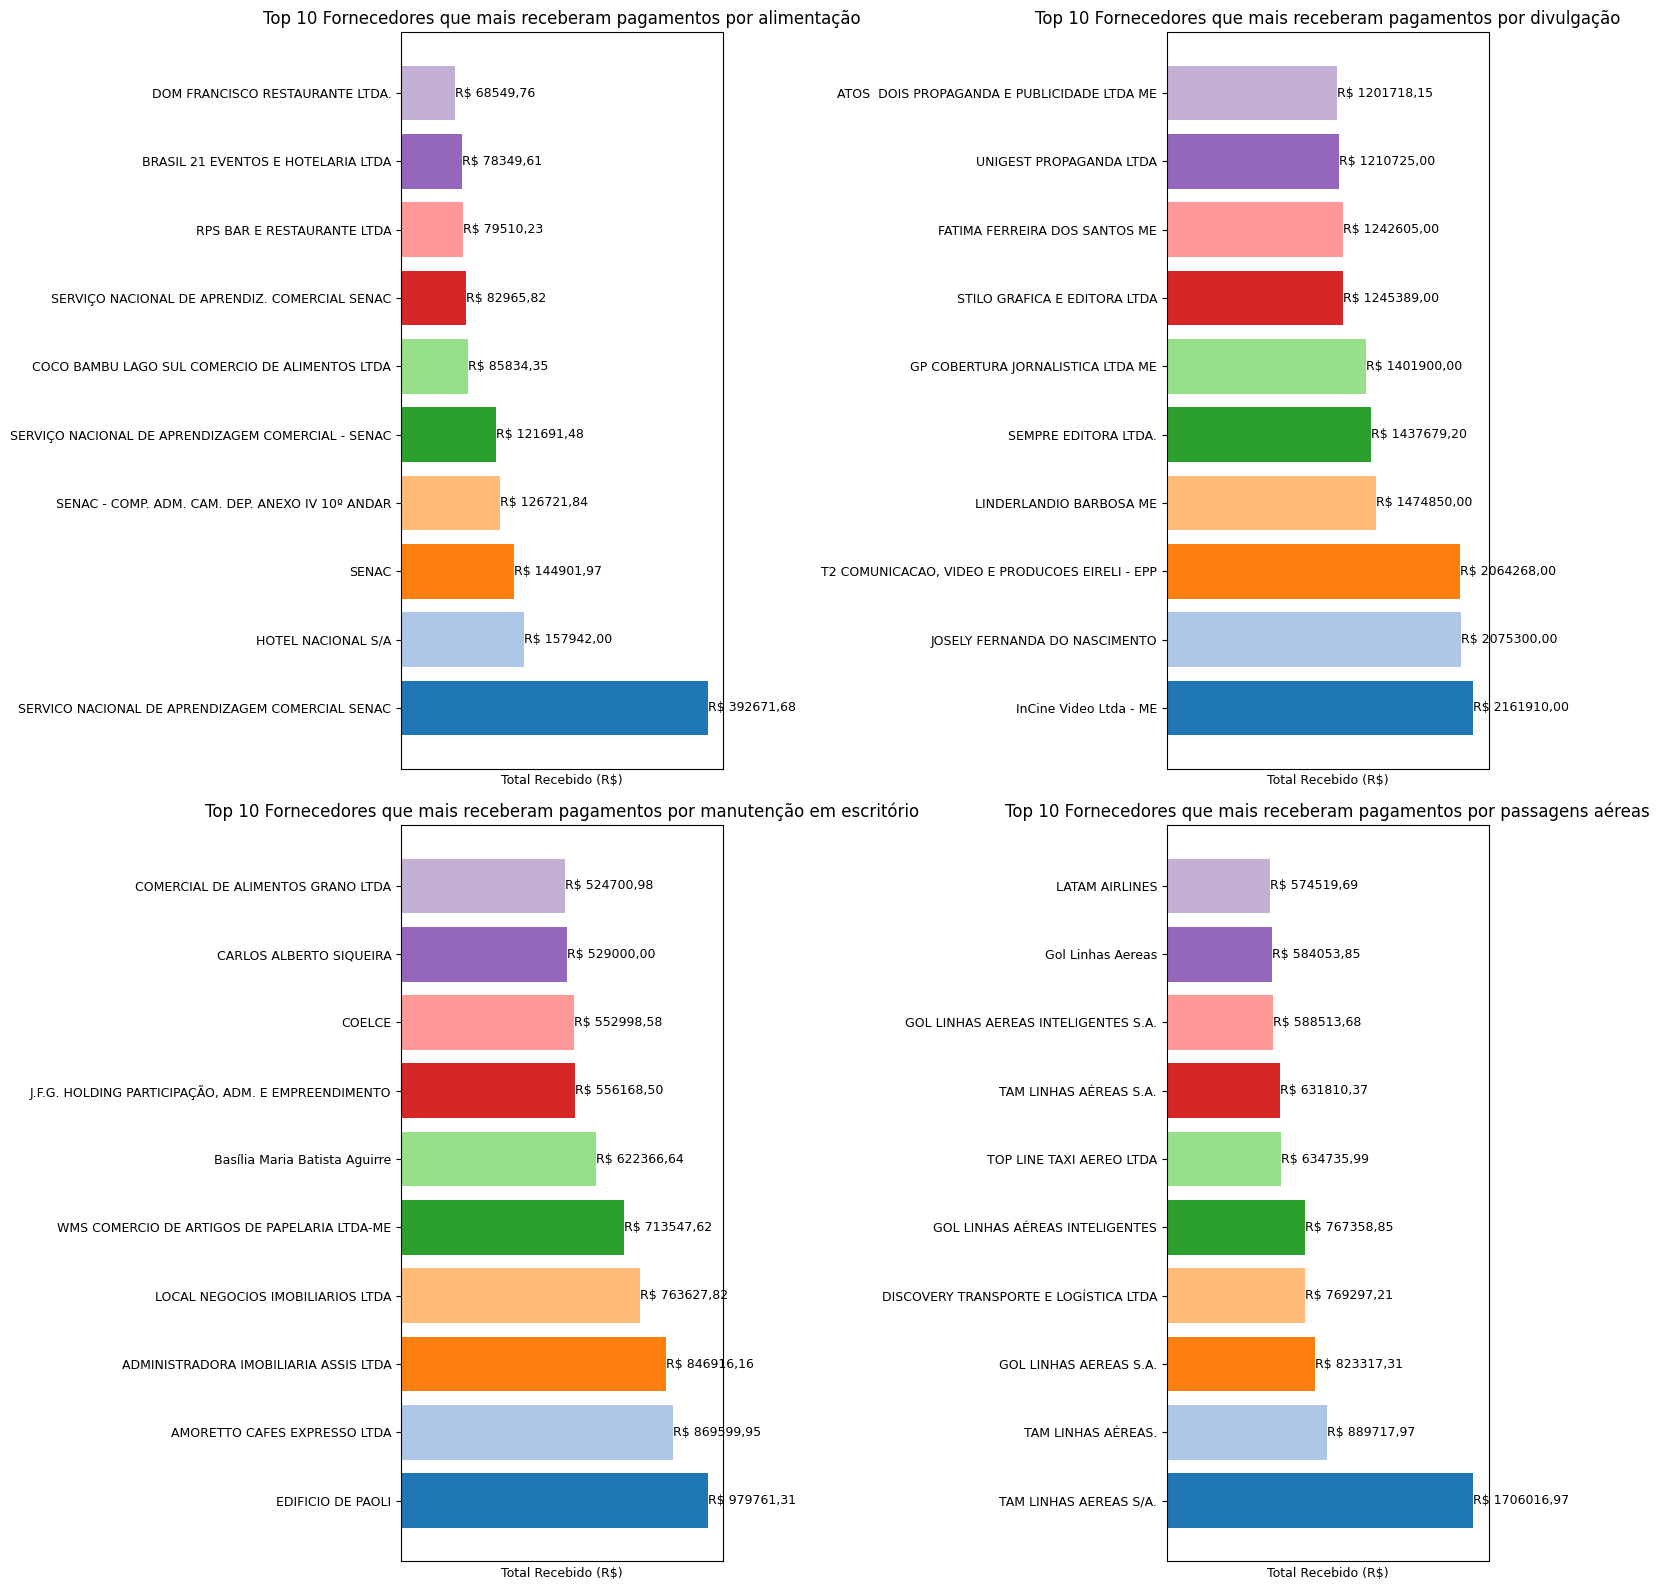

In [15]:
def plot_top_10_pagamentos(data, title, row, col):
    colors = plt.cm.tab20.colors[:10]
    font_size = 9

    ax = axs[row, col].barh(data.index, data.values, color=colors)
    axs[row, col].set_xlabel('Total Recebido (R$)', fontsize=font_size)
    axs[row, col].set_title(title)
    axs[row, col].tick_params(axis='both', which='major', labelsize=font_size)
    axs[row, col].set_xticks([])  # Remover eixo X

    for index, value in enumerate(ax.patches):
        axs[row, col].text(value.get_width(), value.get_y() + value.get_height() / 2, locale.currency(value.get_width()),
                           ha='left', va='center', fontsize=font_size)

# Definir a figura geral e criar subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=10, hspace=0.5)

# Plotar os gráficos usando a função criada
plot_top_10_pagamentos(top_10_pagamentos, 'Top 10 Fornecedores que mais receberam pagamentos por alimentação', 0, 0)
plot_top_10_pagamentos(top_10_pagamentos_fornecedor_divulgacao, 'Top 10 Fornecedores que mais receberam pagamentos por divulgação', 0, 1)
plot_top_10_pagamentos(top_10_pagamentos_por_fornecedor_manutencao_escritorio, 'Top 10 Fornecedores que mais receberam pagamentos por manutenção em escritório', 1, 0)
plot_top_10_pagamentos(top_10_pagamentos_por_fornecedor_passagens_aereas, 'Top 10 Fornecedores que mais receberam pagamentos por passagens aéreas', 1, 1)

# Ajustar o layout para evitar cortes de rótulos
plt.tight_layout()

# Mostrar os gráficos lado a lado
plt.show()

# Selecionando GPU

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
colunas_relevantes = ['vlrdocumento']
df_alimentacao = df_alimentacao[colunas_relevantes]

# Normalização dos dados

In [19]:
scaler_minMax = MinMaxScaler()
dados_normalizados = scaler_minMax.fit_transform(df_alimentacao)

In [20]:
dados_normalizados

array([[0.06377436],
       [0.02314499],
       [0.09240243],
       ...,
       [0.00409419],
       [0.00584688],
       [0.00126764]])

# Divisão de treino e teste

In [21]:
train_data, test_data = train_test_split(dados_normalizados, test_size=0.2, random_state=42)

# Convertendo o DataFrame para um tensor PyTorch

In [22]:
tensor_train_data = torch.tensor(train_data, dtype=torch.float32).to(device, non_blocking=True)
tensor_test_data = torch.tensor(test_data, dtype=torch.float32).to(device, non_blocking=True)

# Criando DataLoader

In [23]:
batch_size = 256
train_data_loader = DataLoader(TensorDataset(tensor_train_data), batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(TensorDataset(tensor_test_data), batch_size=batch_size)

# Rede neural

In [24]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, latent_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, latent_size),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 32),
            nn.ReLU(),
            nn.Linear(32, input_size),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Configuração do modelo e treinamento na GPU

In [25]:
input_size = len(colunas_relevantes)
latent_size = 2
model = Autoencoder(input_size, latent_size).to(device)

# Função de perda e otimizador

In [26]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Treinamento

In [27]:
num_epochs = 5

for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_data_loader:
        input_data = batch[0].to(device)
        optimizer.zero_grad()
        reconstructions = model(input_data)
        loss = criterion(reconstructions, input_data)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_data_loader)}")

Epoch 1/5, Loss: 0.0006066521220446564
Epoch 2/5, Loss: 0.00024404995330680606
Epoch 3/5, Loss: 0.000239552107045021
Epoch 4/5, Loss: 0.00022879400125521104
Epoch 5/5, Loss: 0.00017826631898331652


# Gŕafico de anômalias com gastos em alimentos


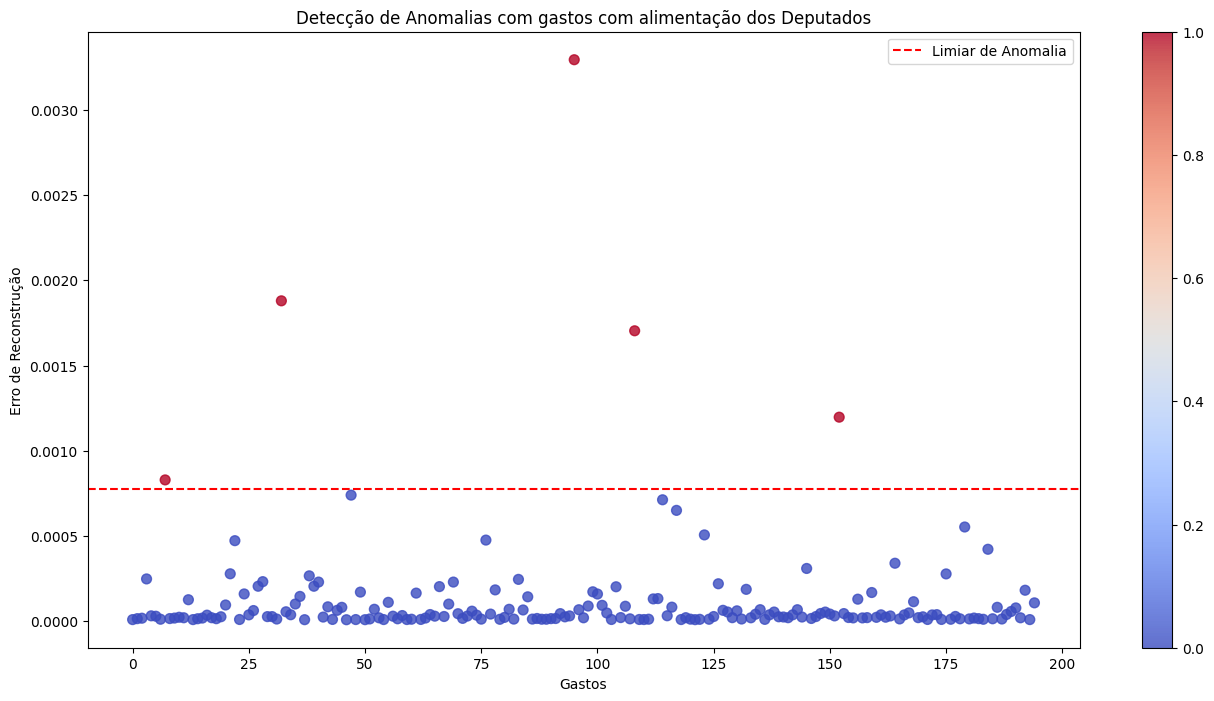

In [28]:
model.eval()
with torch.no_grad():
    all_reconstructions = []
    all_losses = []
    for batch in test_data_loader:
        input_data = batch[0].to(device)
        reconstructions = model(input_data)
        loss = criterion(reconstructions, input_data)
        all_reconstructions.append(reconstructions.cpu().numpy())
        all_losses.append(loss.item())


all_reconstructions = np.concatenate(all_reconstructions)
all_losses = np.array(all_losses)
mean_loss = np.mean(all_losses)
std_loss = np.std(all_losses)

threshold = mean_loss + 2 * std_loss


anomalias = all_losses > threshold

plt.figure(figsize=(16, 8))
plt.scatter(range(len(all_losses)), all_losses, c=anomalias, cmap='coolwarm', marker='o', s=50, alpha=0.8)
plt.axhline(threshold, color='red', linestyle='dashed', label='Limiar de Anomalia')
plt.xlabel('Gastos')
plt.ylabel('Erro de Reconstrução')
plt.title('Detecção de Anomalias com gastos com alimentação dos Deputados')
plt.legend()
plt.colorbar()
plt.show()